In [24]:
import cv2
import numpy as np

## Cropped image

In [25]:
# โหลดภาพ
image = cv2.imread("images/number/0to9.jpg")
if image is None:
    raise FileNotFoundError("ไม่พบไฟล์ภาพ กรุณาตรวจสอบเส้นทางของไฟล์")

# แปลงเป็น Grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# การ Threshold แบบ Adaptive Gaussian
ath_gaussian = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 51,30)

# หา Contours
contours, _ = cv2.findContours(ath_gaussian, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# เรียงลำดับ Contours ตามตำแหน่ง x
contours = sorted(contours, key=lambda c: cv2.boundingRect(c)[0])

i = 1

# วาดกรอบล้อมรอบข้อความ
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)

    # เงื่อนไขกรอง Contours ที่เหมาะสม
    cropped_image = image[y:y+h, x:x+w]
    str1 = f"images/processed-images/number0to9_{i}.jpg"
    cv2.imwrite(str1, cropped_image)
    i+=1

    # วาดกรอบสี่เหลี่ยมล้อมรอบตัวเลข
    if w > 1 and h > 1:
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

# บันทึกภาพผลลัพธ์ที่มีกรอบล้อมรอบ
cv2.imwrite("images/processed-images/number0to9.jpg", image)

True

## Array image

In [119]:
# โหลดภาพ
image = cv2.imread("images/number/0to9.jpg")
if image is None:
    raise FileNotFoundError("ไม่พบไฟล์ภาพ กรุณาตรวจสอบเส้นทางของไฟล์")

# แปลงเป็น Grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# การ Threshold แบบ Adaptive Gaussian
ath_gaussian = cv2.adaptiveThreshold(
    gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 51,30
)

# หา Contours
contours, _ = cv2.findContours(ath_gaussian, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# เรียงลำดับ Contours ตามตำแหน่ง x
#contours = sorted(contours, key=lambda c: cv2.boundingRect(c)[0])

# เรียงลำดับ Contours ตามตำแหน่ง y ก่อน แล้วเรียงตามตำแหน่ง x
contours = sorted(contours, key=lambda c: (cv2.boundingRect(c)[1], cv2.boundingRect(c)[0]))


# สร้าง list เพื่อเก็บภาพที่แยกออกมา
cropped_images = []

# วาดกรอบและเก็บภาพแต่ละตัวเลขใน array
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)

    # วาดกรอบสี่เหลี่ยมล้อมรอบตัวเลข
    if w > 1 and h > 1:

        '''
        # คำนวณขนาดใหม่โดยเพิ่ม 10%
        margin_x = int(w * 0.1)  # เพิ่ม 10% ของความกว้าง
        margin_y = int(h * 0.1)  # เพิ่ม 10% ของความสูง

        # กำหนดขอบเขตใหม่ (ขยายออกไป 10% ทุกด้าน)
        x_start = max(0, x - margin_x)  # ต้องไม่ให้หลุดจากภาพ
        y_start = max(0, y - margin_y)  # ต้องไม่ให้หลุดจากภาพ
        x_end = min(image.shape[1], x + w + margin_x)  # ต้องไม่เกินขอบภาพ
        y_end = min(image.shape[0], y + h + margin_y)  # ต้องไม่เกินขอบภาพ

        # ตัดภาพที่มีขนาดใหญ่ขึ้น
        cropped_image = image[y_start:y_end, x_start:x_end]
        '''
        
        # ตัดภาพปกติ
        cropped_image = image[y:y+h, x:x+w]
        cropped_images.append(cropped_image)  # เก็บภาพใน list

        

        # วาดกรอบสี่เหลี่ยมล้อมรอบตัวเลข
        #cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

# ภาพทั้งหมดที่ตัดแยกจะถูกเก็บใน `cropped_images` เป็น list
# เช่น cropped_images[0], cropped_images[1], ...

# ตัวอย่างการเข้าถึง array ของภาพ
print(f"จำนวนภาพที่แยกได้: {len(cropped_images)}")
for i, img in enumerate(cropped_images):
    print(f"ขนาดของภาพที่ {i+1}: {img.shape}")


จำนวนภาพที่แยกได้: 10
ขนาดของภาพที่ 1: (61, 39, 3)
ขนาดของภาพที่ 2: (62, 36, 3)
ขนาดของภาพที่ 3: (62, 37, 3)
ขนาดของภาพที่ 4: (60, 27, 3)
ขนาดของภาพที่ 5: (60, 39, 3)
ขนาดของภาพที่ 6: (62, 37, 3)
ขนาดของภาพที่ 7: (61, 37, 3)
ขนาดของภาพที่ 8: (60, 38, 3)
ขนาดของภาพที่ 9: (61, 37, 3)
ขนาดของภาพที่ 10: (62, 36, 3)


## Visualization

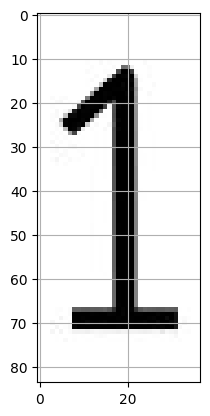

In [109]:
import matplotlib.pyplot as plt

idx = 1
img = cropped_images[idx]                  # image at index
plt.imshow(img, cmap=plt.cm.gray_r) # actutal BG is black (invert)
#plt.imshow(img, cmap=plt.cm.gray)  

plt.grid() 
plt.show()

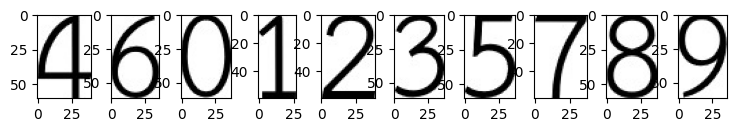

In [120]:
def visual_multi(i):
    nplots = len(cropped_images)
    fig = plt.figure(figsize=(9, 5))
    for j in range(nplots):
        plt.subplot(4, 10, j+1)
        plt.imshow(cropped_images[i+j], cmap=plt.cm.gray_r)
        #plt.title(y_train[i+j])
    
    plt.show()
visual_multi(0) # ตัวเริ่มจากเลขอะไร

## Load model

In [79]:
from tensorflow.keras.models import load_model

model = load_model('model/numrals_model.h5') # Load model
model.summary() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 128)               2

## Read Image and predict

img shape: (32, 32, 1)
max pixel value: 254.97452
Expandim: (1, 32, 32, 1)
1/1 [==============================] - 0s 17ms/step
Predicted probabilities: [[0.    0.    0.    0.    0.    0.076 0.    0.    0.924 0.   ]]

Predicted Number= 8


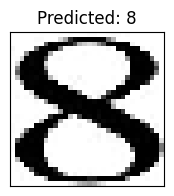

In [46]:
from tensorflow. keras.preprocessing. image import load_img, img_to_array
from tensorflow. image import rgb_to_grayscale
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageOps

# เลือกภาพ
filename = 'images/number/test_8_3.jpg'
# filename = 'data/digit4
# cropped_images[idx]

# โหลดและแปลงภาพเป็น array
img = load_img(filename , target_size=(32, 32))
#display(img)
#img = ImageOps.invert(img)
img = img_to_array(img)

# หากภาพมีสีผิด (ตัวเลขสีขาวบนพื้นดำ) ให้ invert สี
# img = ImageOps.invert(img)

# แปลงเป็น Grayscale
img = rgb_to_grayscale(img)

# แสดงข้อมูลภาพ
print('img shape:', img.shape)
print('max pixel value:',np.max(img))

# Normalize ค่า pixel ให้อยู่ในช่วง [0, 1]
img /= 255.0

# เพิ่ม Batch Dimension
img = np.expand_dims(img, axis=0)
print('Expandim:', img.shape)

# ส่งภาพเข้าสู่โมเดลเพื่อทำนาย
y_pred = model.predict(img)
print('Predicted probabilities:', y_pred.round(3))

# หาค่าที่โมเดลทำนายได้ (คลาสที่มีค่าความน่าจะเป็นสูงสุด)
predicted = np.argmax(y_pred, -1)
# predicted = np.argmax(y_pred, axis=1)
print('\nPredicted Number=', predicted[0])

# แสดงภาพพร้อมผลลัพธ์
plt.figure(figsize=(2,2))
plt.imshow(img[0].reshape(32,32), cmap=plt.cm.gray)
plt.title('Predicted: {}'. format(predicted[0]))
plt.xticks([])
plt.yticks([])
plt.show()

## Read Array Image and predict

Original Image Shape: (62, 37, 3)
Grayscale Image Shape: (32, 32, 1)
Input Shape (for model): (1, 32, 32, 1)
1/1 [==============================] - 0s 15ms/step
Predicted Probabilities: [[0.    0.    0.989 0.    0.    0.007 0.    0.004 0.    0.   ]]
Predicted Number = 2


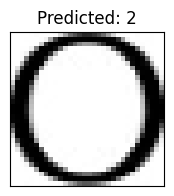

In [69]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.image import rgb_to_grayscale, resize
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageOps

# ใช้รูปจาก list ที่สร้างไว้ก่อนหน้า
cropped_image = cropped_images[0]  

# ตรวจสอบขนาดของรูปภาพที่เข้ามา
print('Original Image Shape:', cropped_image.shape)

# ย่อขนาดภาพให้เป็น (32, 32)
resized_image = resize(cropped_image, (32, 32)).numpy()

# ตรวจสอบว่าเป็น RGB หรือไม่
if resized_image.shape[-1] == 3:  # ตรวจสอบว่าเป็นภาพสี
    # แปลงเป็น Grayscale
    grayscale_image = rgb_to_grayscale(resized_image)
else:
    grayscale_image = resized_image[..., np.newaxis]  # เพิ่มแกนช่องสี หากไม่มี

# ตรวจสอบขนาดหลังแปลง Grayscale
print('Grayscale Image Shape:', grayscale_image.shape)

# Normalize ค่า Pixel
normalized_image = grayscale_image / 255.0

# เพิ่ม Batch Dimension
input_image = np.expand_dims(normalized_image, axis=0)
print('Input Shape (for model):', input_image.shape)

# ส่งภาพเข้าโมเดล
y_pred = model.predict(input_image)
print('Predicted Probabilities:', y_pred.round(3))

# หาค่าที่โมเดลทำนายได้ (คลาสที่มีค่าความน่าจะเป็นสูงสุด)
predicted_class = np.argmax(y_pred, axis=-1)
print('Predicted Number =', predicted_class[0])

# แสดงภาพและผลลัพธ์
plt.figure(figsize=(2, 2))
plt.imshow(input_image[0].reshape(32,32), cmap=plt.cm.gray)
plt.title(f'Predicted: {predicted_class[0]}')
plt.xticks([])
plt.yticks([])
plt.show()

## Read Array Image and predict (Loop)

In [94]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.image import rgb_to_grayscale
from tensorflow.image import resize

# สมมติ cropped_images เป็น list ของ array ที่ได้จากการแยกตัวเลข
# ตัวอย่างข้อมูล: cropped_images = [image1_array, image2_array, ...]

results = []  # เก็บผลการทำนาย

for idx, cropped_image in enumerate(cropped_images):
    print(f"\nProcessing Image {idx+1}/{len(cropped_images)}")
    
    # Resize ภาพให้เป็นขนาด (32, 32)
    resized_image = resize(cropped_image, (32, 32)).numpy()

    # ตรวจสอบว่าภาพเป็น RGB หรือไม่
    if resized_image.shape[-1] == 3:  # ถ้าเป็นภาพสี
        grayscale_image = rgb_to_grayscale(resized_image)
    else:
        grayscale_image = resized_image[..., np.newaxis]  # เพิ่มแกนช่องสี

    # Normalize ค่า Pixel
    normalized_image = grayscale_image / 255.0

    # เพิ่ม Batch Dimension
    input_image = np.expand_dims(normalized_image, axis=0)

    # ส่งภาพเข้าโมเดลเพื่อทำนาย
    y_pred = model.predict(input_image)
    predicted_class = np.argmax(y_pred, axis=-1)[0]  # ดึงคลาสที่ทำนายได้

    # เก็บผลลัพธ์
    results.append(predicted_class)

    # แสดงผลการทำนาย
    print(f"Predicted Class for Image {idx+1}: {predicted_class}")

    # แสดงภาพพร้อมผลลัพธ์
    #plt.figure(figsize=(2, 2))
    #plt.imshow(grayscale_image.squeeze(), cmap=plt.cm.gray)
    #plt.title(f'Predicted: {predicted_class}')
    #plt.xticks([])
    #plt.yticks([])
    #plt.show()

# สรุปผลการทำนาย
print("\nFinal Results:")
for i, result in enumerate(results):
    print(f"Image {i+1}: Predicted Number = {result}")



Processing Image 1/10
1/1 [==============================] - 0s 17ms/step
Predicted Class for Image 1: 0

Processing Image 2/10
1/1 [==============================] - 0s 17ms/step
Predicted Class for Image 2: 2

Processing Image 3/10
1/1 [==============================] - 0s 16ms/step
Predicted Class for Image 3: 3

Processing Image 4/10
1/1 [==============================] - 0s 16ms/step
Predicted Class for Image 4: 3

Processing Image 5/10
1/1 [==============================] - 0s 16ms/step
Predicted Class for Image 5: 4

Processing Image 6/10
1/1 [==============================] - 0s 15ms/step
Predicted Class for Image 6: 6

Processing Image 7/10
1/1 [==============================] - 0s 16ms/step
Predicted Class for Image 7: 0

Processing Image 8/10
1/1 [==============================] - 0s 17ms/step
Predicted Class for Image 8: 0

Processing Image 9/10
1/1 [==============================] - 0s 17ms/step
Predicted Class for Image 9: 5

Processing Image 10/10
1/1 [=================